In [7]:
import os
import numpy as np
from matplotlib import pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn import cluster

DIR_PATH = os.getcwd() + '/../'

In [3]:
demo_data = np.load(DIR_PATH + 'data/demos_reach_object_no_distractors_227_16x16.npz')
for k in demo_data.keys():
    print(k, demo_data[k].shape, demo_data[k].dtype)

demo_image_sequences (28763, 16, 16, 3) float32
demo_action_sequences (28763, 3) float64
step_marker (227,) int64


In [4]:
n_traj = 50
n_train = int(0.8 * n_traj)
n_val = n_traj - n_train
idx_train = demo_data['step_marker'][n_train-1]
idx_val = demo_data['step_marker'][n_traj-1]

train_imgs = demo_data['demo_image_sequences'][:idx_train]
train_act = demo_data['demo_action_sequences'][:idx_train]
val_imgs = demo_data['demo_image_sequences'][idx_train:idx_val]
val_acts = demo_data['demo_action_sequences'][idx_train:idx_val]
train_imgs.shape, train_act.shape

((5197, 16, 16, 3), (5197, 3))

In [46]:
n_clusters = 8
km = cluster.KMeans(n_clusters=n_clusters)
X = train_imgs.reshape(5197, 16*16*3)
km.fit(X)

KMeans()

In [47]:
bags = [[] for _ in range(n_clusters)]

for i, img in zip(km.labels_, X):
    bags[i].append(img)

(array([ 497., 1192.,  815.,    0.,  184.,  364.,    0.,  831.,  394.,
         920.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

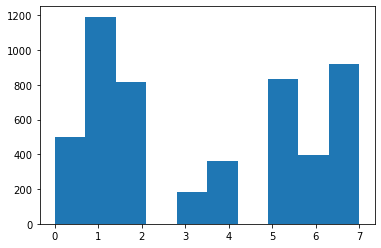

In [49]:
plt.hist(km.labels_)

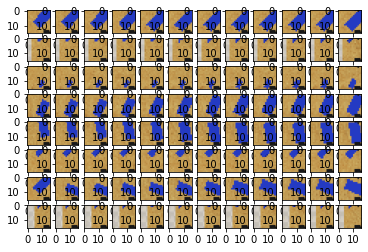

In [48]:
n_ex = 12
plt.figure()
for i in range(n_clusters):
    for j in range(n_ex):
        plt.subplot(n_clusters, n_ex, i*n_ex+j+1)
        plt.imshow(bags[i][j].reshape(16, 16, 3))